In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%load_ext google.colab.data_table

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 9/volaille2017.csv', index_col=0)
# index_col=0 supprime l'apparition de la colonne unnamed_0 du a un problème de header

In [4]:
df


,Zone,tonnage exporte,Political_Stability,PIB_2017_euro,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,dist
0,Afghanistan,0.00,-2.80,530.15,1.53,57.0,0.0,29.0,55.0,28.0,5590.3810
1,Afrique du Sud,0.00,-0.28,6734.48,35.69,2118.0,63.0,514.0,2035.0,1667.0,9353.5520
2,Albanie,0.44,0.38,4531.03,16.36,47.0,0.0,38.0,47.0,13.0,1603.5340
3,Algérie,51.47,-0.92,4134.94,6.38,277.0,0.0,2.0,264.0,275.0,1340.3900
4,Allemagne,1313.49,0.59,44652.59,19.47,1739.0,646.0,842.0,1609.0,1514.0,439.8984
...,...,...,...,...,...,...,...,...,...,...,...
168,Émirats arabes unis,0.00,0.62,43063.97,43.47,412.0,94.0,433.0,412.0,48.0,5249.5350
169,Équateur,0.00,-0.07,6246.40,19.31,341.0,0.0,0.0,324.0,340.0,9367.0980
170,États-Unis d'Amérique,0.00,0.34,59907.75,55.68,18266.0,3692.0,123.0,18100.0,21914.0,5838.1570
171,Éthiopie,0.00,-1.68,755.75,0.13,14.0,0.0,1.0,14.0,14.0,5582.5020


In [5]:
#renommage de la colonne tonnage exporte pour quelle soit plus explicite
df.rename(columns={'tonnage exporte':'tonnage exporte de France'}, inplace = True)

In [6]:
df.shape

(173, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    173 non-null    object 
 1   tonnage exporte de France                               173 non-null    float64
 2   Political_Stability                                     173 non-null    float64
 3   PIB_2017_euro                                           173 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)  173 non-null    float64
 5   Disponibilité intérieure                                173 non-null    float64
 6   Exportations - Quantité                                 173 non-null    float64
 7   Importations - Quantité                                 173 non-null    float64
 8   Nourriture                              

In [8]:
df.isna().mean()

Zone                                                      0.0
tonnage exporte de France                                 0.0
Political_Stability                                       0.0
PIB_2017_euro                                             0.0
Disponibilité alimentaire en quantité (kg/personne/an)    0.0
Disponibilité intérieure                                  0.0
Exportations - Quantité                                   0.0
Importations - Quantité                                   0.0
Nourriture                                                0.0
Production                                                0.0
dist                                                      0.0
dtype: float64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

Zone                                                      172
tonnage exporte de France                                  62
Political_Stability                                       135
PIB_2017_euro                                             173
Disponibilité alimentaire en quantité (kg/personne/an)    169
Disponibilité intérieure                                  136
Exportations - Quantité                                    50
Importations - Quantité                                    84
Nourriture                                                131
Production                                                125
dist                                                      171
dtype: int64

In [11]:
# attention juste pour essai
#df.fillna(df.mean())

In [12]:
df = df.set_index('Zone')

In [13]:
#df.drop(['Unamed:0'], axis=1, inplace=True)

In [14]:
X = df.values
X[:5]

array([[ 0.000000e+00, -2.800000e+00,  5.301500e+02,  1.530000e+00,
         5.700000e+01,  0.000000e+00,  2.900000e+01,  5.500000e+01,
         2.800000e+01,  5.590381e+03],
       [ 0.000000e+00, -2.800000e-01,  6.734480e+03,  3.569000e+01,
         2.118000e+03,  6.300000e+01,  5.140000e+02,  2.035000e+03,
         1.667000e+03,  9.353552e+03],
       [ 4.400000e-01,  3.800000e-01,  4.531030e+03,  1.636000e+01,
         4.700000e+01,  0.000000e+00,  3.800000e+01,  4.700000e+01,
         1.300000e+01,  1.603534e+03],
       [ 5.147000e+01, -9.200000e-01,  4.134940e+03,  6.380000e+00,
         2.770000e+02,  0.000000e+00,  2.000000e+00,  2.640000e+02,
         2.750000e+02,  1.340390e+03],
       [ 1.313490e+03,  5.900000e-01,  4.465259e+04,  1.947000e+01,
         1.739000e+03,  6.460000e+02,  8.420000e+02,  1.609000e+03,
         1.514000e+03,  4.398984e+02]])

In [15]:
X.shape

(173, 10)

In [16]:
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=173)

In [17]:
features = df.columns
features

Index(['tonnage exporte de France', 'Political_Stability', 'PIB_2017_euro',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production', 'dist'],
      dtype='object')

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.10460228, -3.07863465, -0.71169895, -1.18532304, -0.28626112,
        -0.22646574, -0.32247728, -0.27979884, -0.27483055, -0.11746367],
       [-0.10460228, -0.24348137, -0.38721759,  0.98099619,  0.66639206,
        -0.08814968,  2.30267611,  0.6571401 ,  0.39124388,  0.84251388],
       [-0.104527  ,  0.49905877, -0.50245621, -0.24485132, -0.29088341,
        -0.22646574, -0.27376309, -0.28358445, -0.28092641, -1.13450053],
       [-0.095797  , -0.9635203 , -0.52317139, -0.87775137, -0.18457083,
        -0.22646574, -0.46861984, -0.18089973, -0.17445204, -1.20162805],
       [ 0.12010422,  0.73532155,  1.59586841, -0.04762495,  0.49120741,
         1.19182276,  4.07803758,  0.45555627,  0.3290661 , -1.4313417 ]])

In [21]:
X_scaled = scaler.fit_transform(X)

In [22]:
#vérification que les moyennes sont bien à0 et les ecartype à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [23]:
n_components = 9

In [24]:
pca = PCA(n_components=n_components)

In [25]:
pca.fit(X_scaled)

PCA(n_components=9)

In [26]:
pca.explained_variance_ratio_

array([3.78723082e-01, 1.95132692e-01, 1.33597034e-01, 8.77839869e-02,
       8.28573246e-02, 5.44987920e-02, 3.47635697e-02, 3.24532357e-02,
       1.49548656e-04])

In [27]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([3.787e+01, 1.951e+01, 1.336e+01, 8.780e+00, 8.290e+00, 5.450e+00,
       3.480e+00, 3.250e+00, 1.000e-02])

In [28]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 38.,  57.,  71.,  80.,  88.,  93.,  97., 100., 100.])

In [29]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

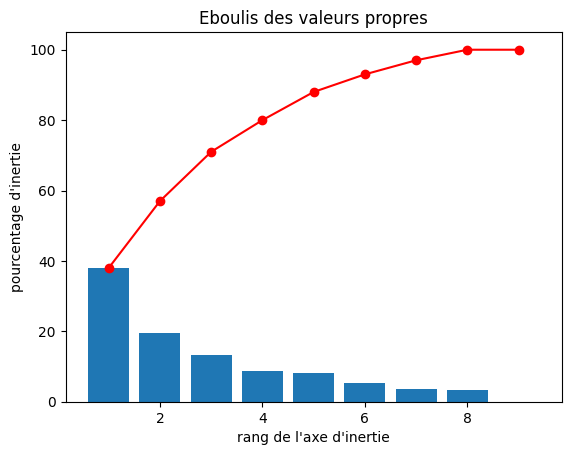

In [30]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [31]:
pcs = pca.components_
pcs

array([[ 3.89810924e-02,  4.85758880e-02,  1.47053129e-01,
         1.75964241e-01,  4.91076308e-01,  4.22181895e-01,
         1.81686365e-01,  4.93051548e-01,  4.97877357e-01,
         1.21532316e-02],
       [ 1.90412898e-01,  5.80061560e-01,  5.65327948e-01,
         4.24842883e-01, -1.53677337e-01, -1.88144204e-02,
         2.25058477e-01, -1.50465879e-01, -1.52212925e-01,
        -8.21801116e-02],
       [ 5.37797571e-01, -2.33298244e-01,  1.12976840e-01,
        -3.72131017e-01, -2.82578989e-02,  8.95873762e-02,
         2.79923351e-01, -2.65627254e-02, -2.93808565e-02,
        -6.45251997e-01],
       [ 5.99898699e-01, -7.31432490e-02, -2.60483963e-01,
         4.21371136e-02, -3.38441560e-02, -7.90862901e-03,
         3.97015262e-01, -3.92420319e-02, -5.91810829e-02,
         6.33460935e-01],
       [ 4.84996687e-01,  1.83932120e-01,  1.08042835e-02,
        -4.60759075e-02, -4.64507206e-02,  3.09043058e-01,
        -7.87496472e-01, -4.12173827e-02,  6.74638265e-02,
         6.

In [32]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9
0,0.038981,0.048576,0.147053,0.175964,0.491076,0.422182,0.181686,0.493052,0.497877,0.012153
1,0.190413,0.580062,0.565328,0.424843,-0.153677,-0.018814,0.225058,-0.150466,-0.152213,-0.082180
2,0.537798,-0.233298,0.112977,-0.372131,-0.028258,0.089587,0.279923,-0.026563,-0.029381,-0.645252
3,0.599899,-0.073143,-0.260484,0.042137,-0.033844,-0.007909,0.397015,-0.039242,-0.059181,0.633461
4,0.484997,0.183932,0.010804,-0.046076,-0.046451,0.309043,-0.787496,-0.041217,0.067464,0.068127
5,-0.067498,0.401545,0.291927,-0.775306,0.121295,-0.198128,0.040769,0.109945,0.071823,0.273878
6,-0.014110,-0.635294,0.701604,0.012413,-0.047565,0.014634,-0.114866,-0.046228,-0.033435,0.291332
7,-0.270419,0.051995,-0.024013,-0.211860,-0.291394,0.809927,0.205929,-0.267189,-0.114406,0.104552
8,-0.001633,-0.003285,0.000280,0.005008,0.339646,-0.075168,0.032338,-0.792257,0.500215,-0.004457


In [33]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,tonnage exporte de France,Political_Stability,PIB_2017_euro,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,dist
F1,0.04,0.05,0.15,0.18,0.49,0.42,0.18,0.49,0.50,0.01
F2,0.19,0.58,0.57,0.42,-0.15,-0.02,0.23,-0.15,-0.15,-0.08
F3,0.54,-0.23,0.11,-0.37,-0.03,0.09,0.28,-0.03,-0.03,-0.65
F4,0.60,-0.07,-0.26,0.04,-0.03,-0.01,0.40,-0.04,-0.06,0.63
F5,0.48,0.18,0.01,-0.05,-0.05,0.31,-0.79,-0.04,0.07,0.07
F6,-0.07,0.40,0.29,-0.78,0.12,-0.20,0.04,0.11,0.07,0.27
F7,-0.01,-0.64,0.70,0.01,-0.05,0.01,-0.11,-0.05,-0.03,0.29
F8,-0.27,0.05,-0.02,-0.21,-0.29,0.81,0.21,-0.27,-0.11,0.10
F9,-0.00,-0.00,0.00,0.01,0.34,-0.08,0.03,-0.79,0.50,-0.00


In [34]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9
tonnage exporte de France,0.038981,0.190413,0.537798,0.599899,0.484997,-0.067498,-0.014110,-0.270419,-0.001633
Political_Stability,0.048576,0.580062,-0.233298,-0.073143,0.183932,0.401545,-0.635294,0.051995,-0.003285
PIB_2017_euro,0.147053,0.565328,0.112977,-0.260484,0.010804,0.291927,0.701604,-0.024013,0.000280
Disponibilité alimentaire en quantité (kg/personne/an),0.175964,0.424843,-0.372131,0.042137,-0.046076,-0.775306,0.012413,-0.211860,0.005008
Disponibilité intérieure,0.491076,-0.153677,-0.028258,-0.033844,-0.046451,0.121295,-0.047565,-0.291394,0.339646
Exportations - Quantité,0.422182,-0.018814,0.089587,-0.007909,0.309043,-0.198128,0.014634,0.809927,-0.075168
Importations - Quantité,0.181686,0.225058,0.279923,0.397015,-0.787496,0.040769,-0.114866,0.205929,0.032338
Nourriture,0.493052,-0.150466,-0.026563,-0.039242,-0.041217,0.109945,-0.046228,-0.267189,-0.792257
Production,0.497877,-0.152213,-0.029381,-0.059181,0.067464,0.071823,-0.033435,-0.114406,0.500215
dist,0.012153,-0.082180,-0.645252,0.633461,0.068127,0.273878,0.291332,0.104552,-0.004457


<Axes: >

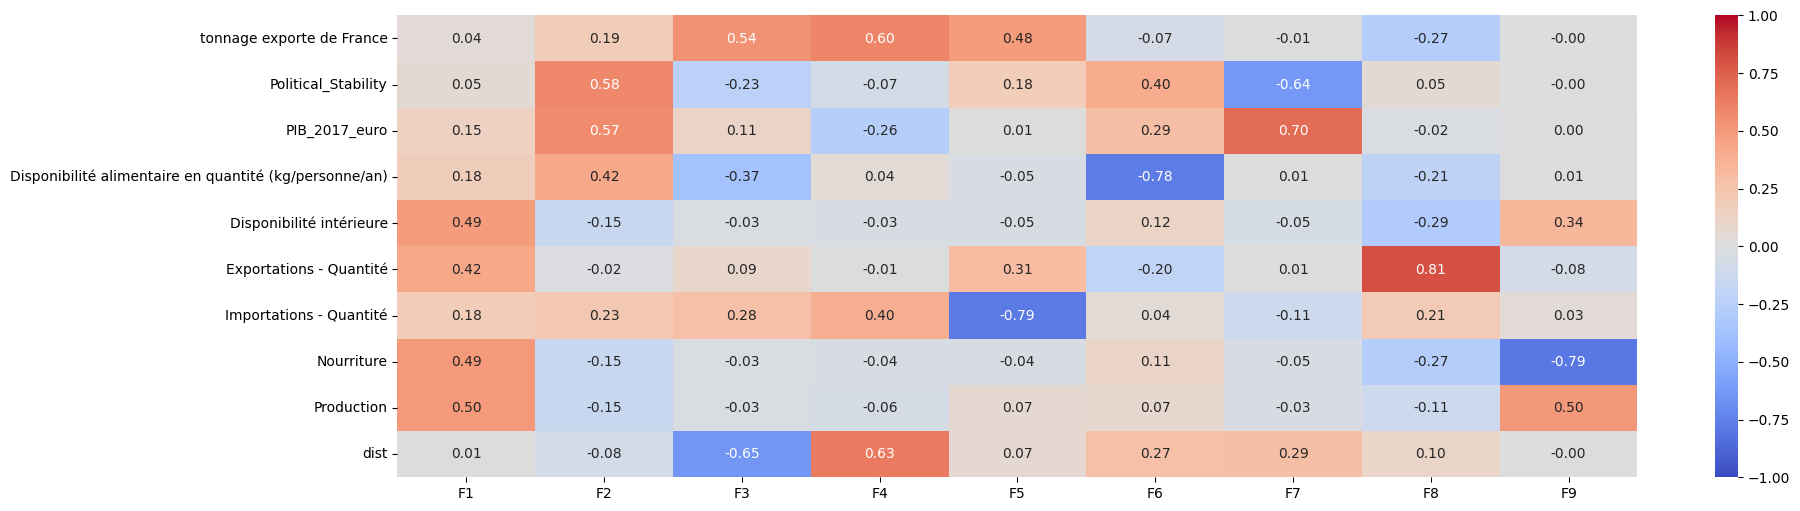

In [35]:
# Affichage du heatmap des correlations
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Fonction permettant de tracer les cercles de correlation

In [36]:
def correlation_graph(pca,
                      x_y,
                      features) :# code repris du cours d'Openclassroom
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.02,
                head_length=0.02,
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [37]:
#projetion des données sur les axes principaux de l'ACP
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.03784719e+00, -2.64237207e+00,  1.01150757e+00,
         1.34157538e-01, -3.87817991e-01, -6.03600239e-01,
         1.47851471e+00,  6.39325487e-02, -1.76056125e-03],
       [ 1.33720754e+00,  2.26531003e-01, -3.62996203e-01,
         1.47435767e+00, -1.95973852e+00, -4.41049847e-01,
        -1.98831772e-01, -1.06552598e-01, -1.54693819e-02],
       [-6.78476395e-01,  4.75197419e-02,  5.20830920e-01,
        -7.66604134e-01,  1.21508719e-01, -1.13041505e-01,
        -9.37185187e-01, -4.75839926e-02, -4.25845996e-03],
       [-7.43967175e-01, -1.16613058e+00,  1.07983358e+00,
        -8.09474488e-01,  3.25534027e-02, -2.10775565e-01,
        -4.10685032e-02, -1.09149568e-01, -6.28945456e-04],
       [ 2.12305984e+00,  2.15023711e+00,  2.22729818e+00,
         2.49504136e-01, -2.74708604e+00,  4.61373929e-01,
        -2.73169188e-01,  1.33044787e+00,  1.67872683e-02]])

Fonction permettant d'afficher les plans factoriels

In [38]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):# code repris d'openclassroom
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



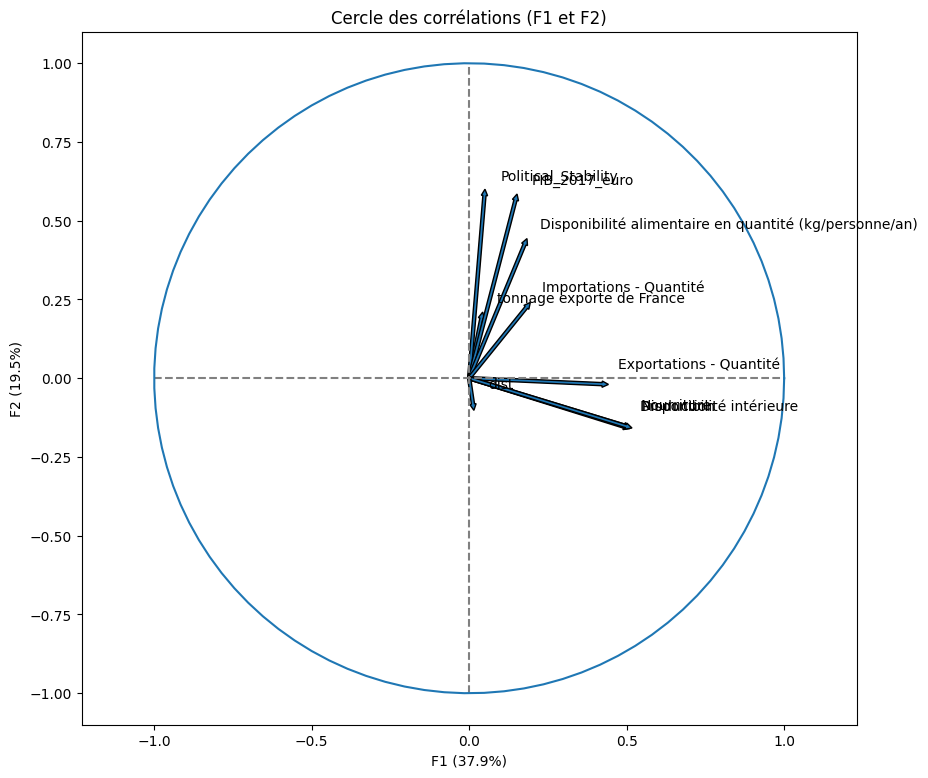

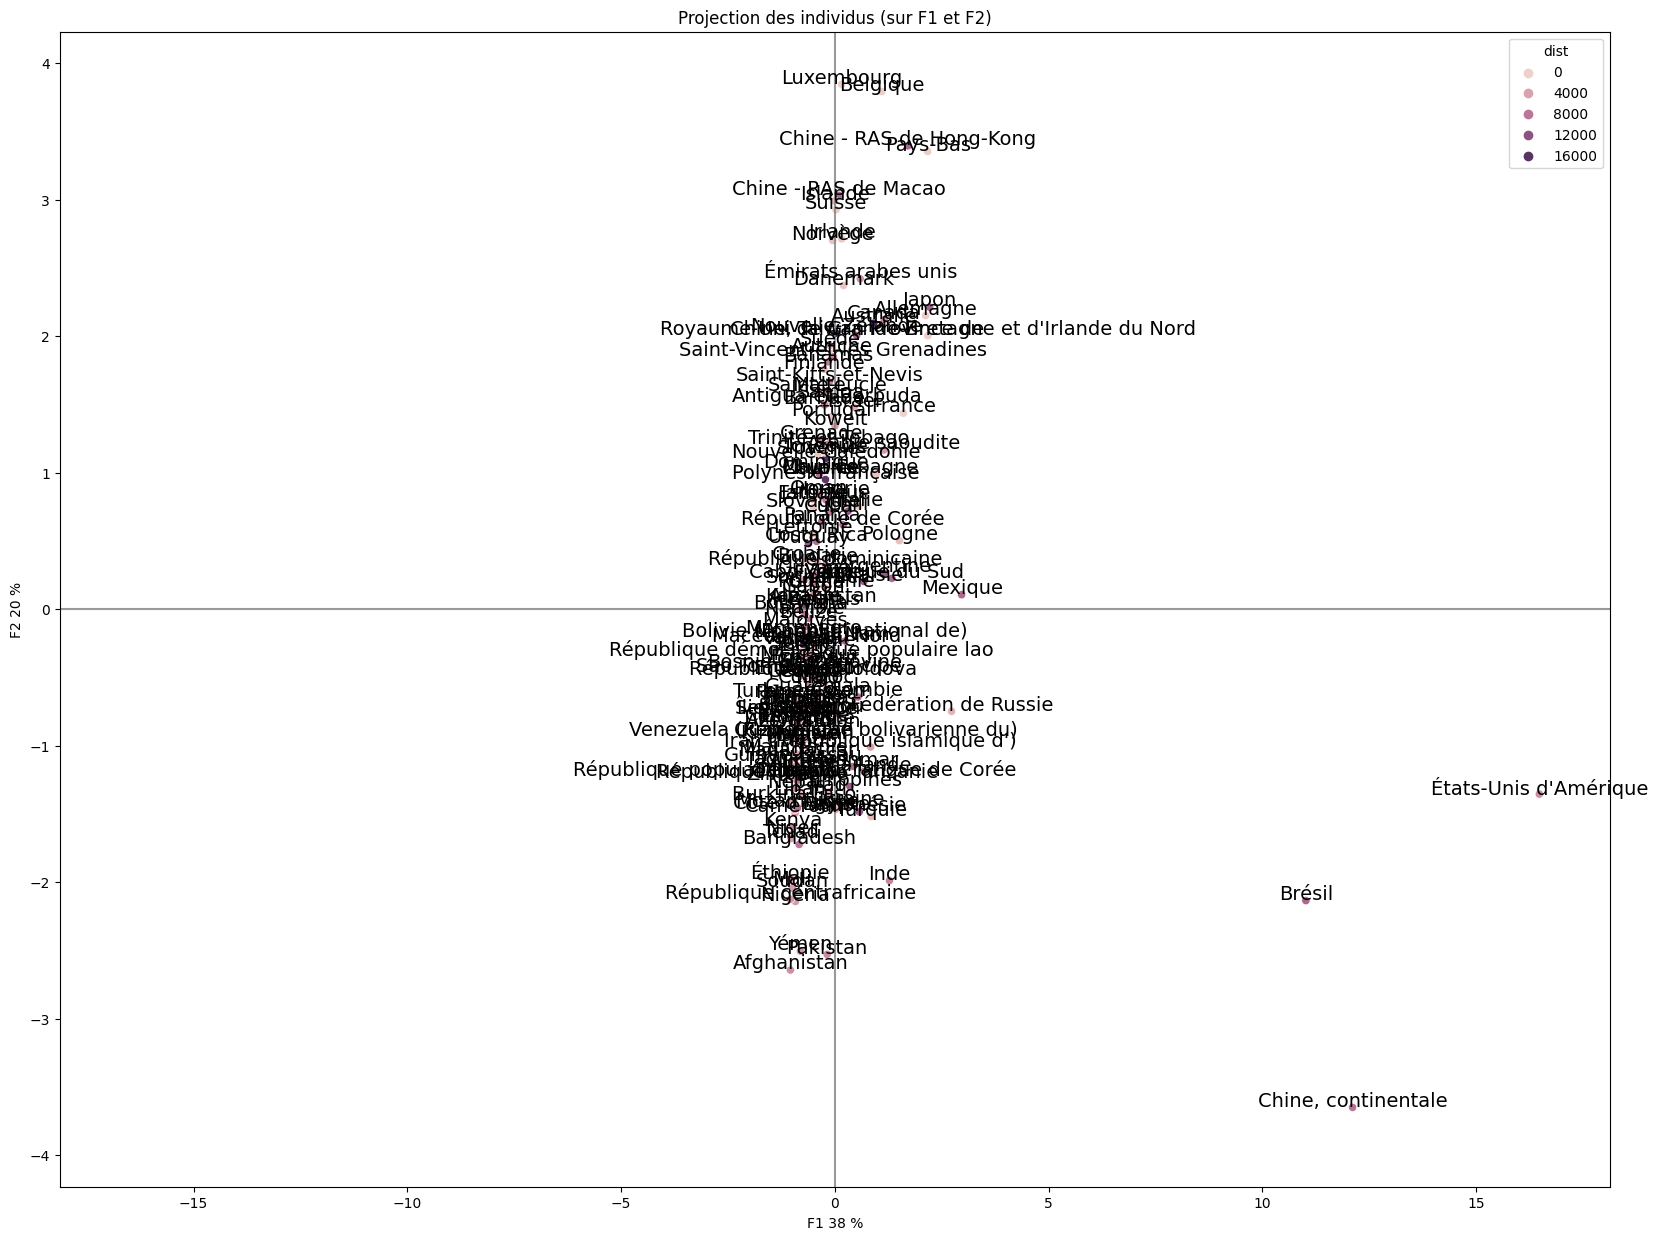

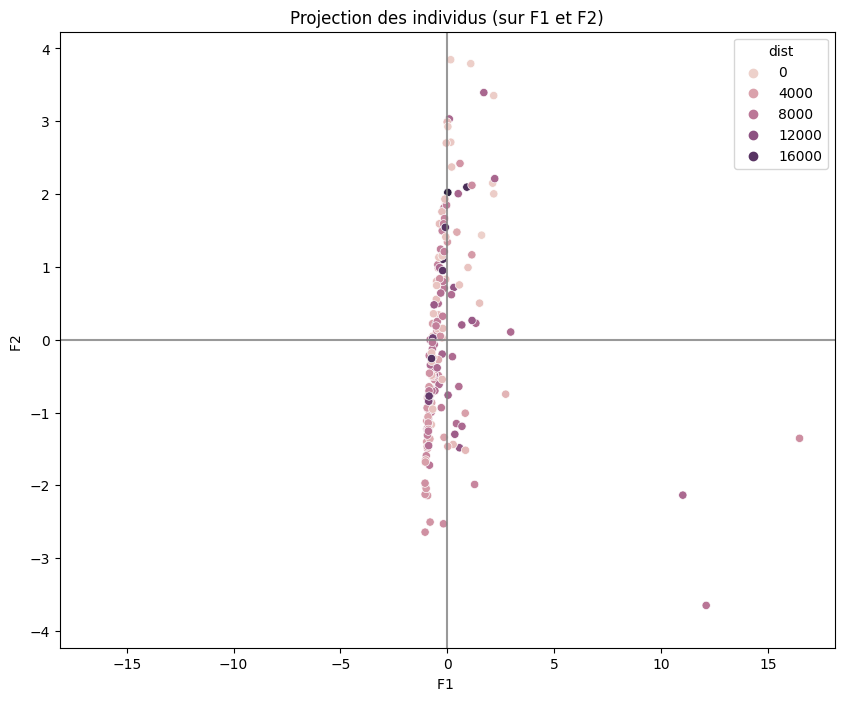

In [39]:
x_y = [0,1] #F1 et F2
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['dist'], marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['dist'])


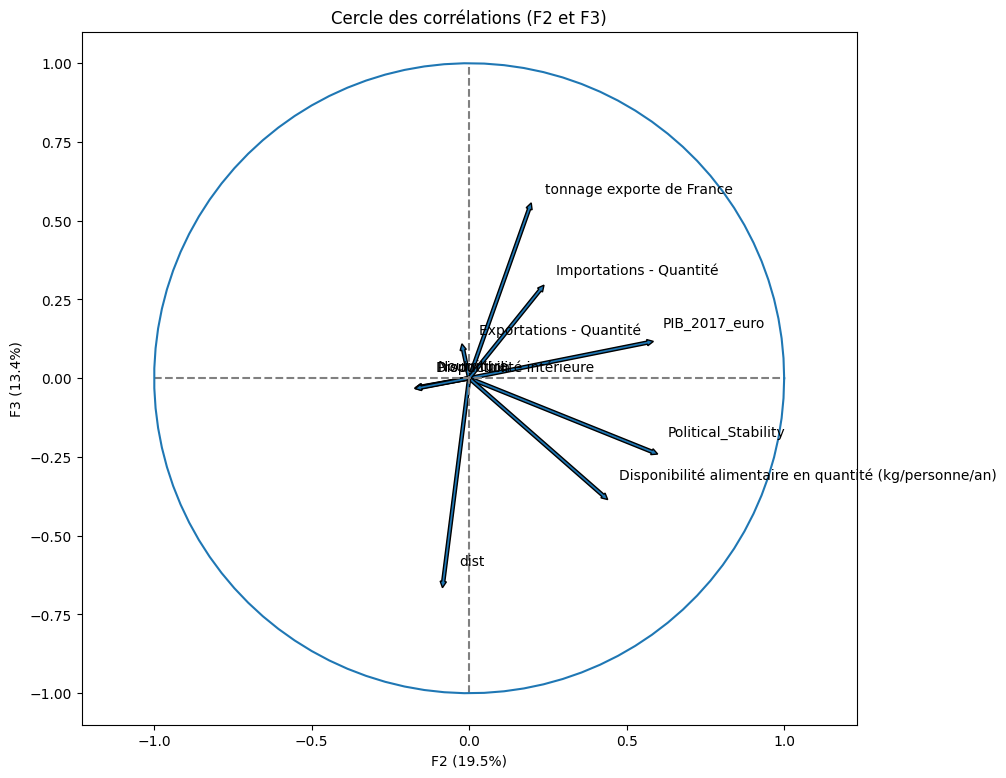

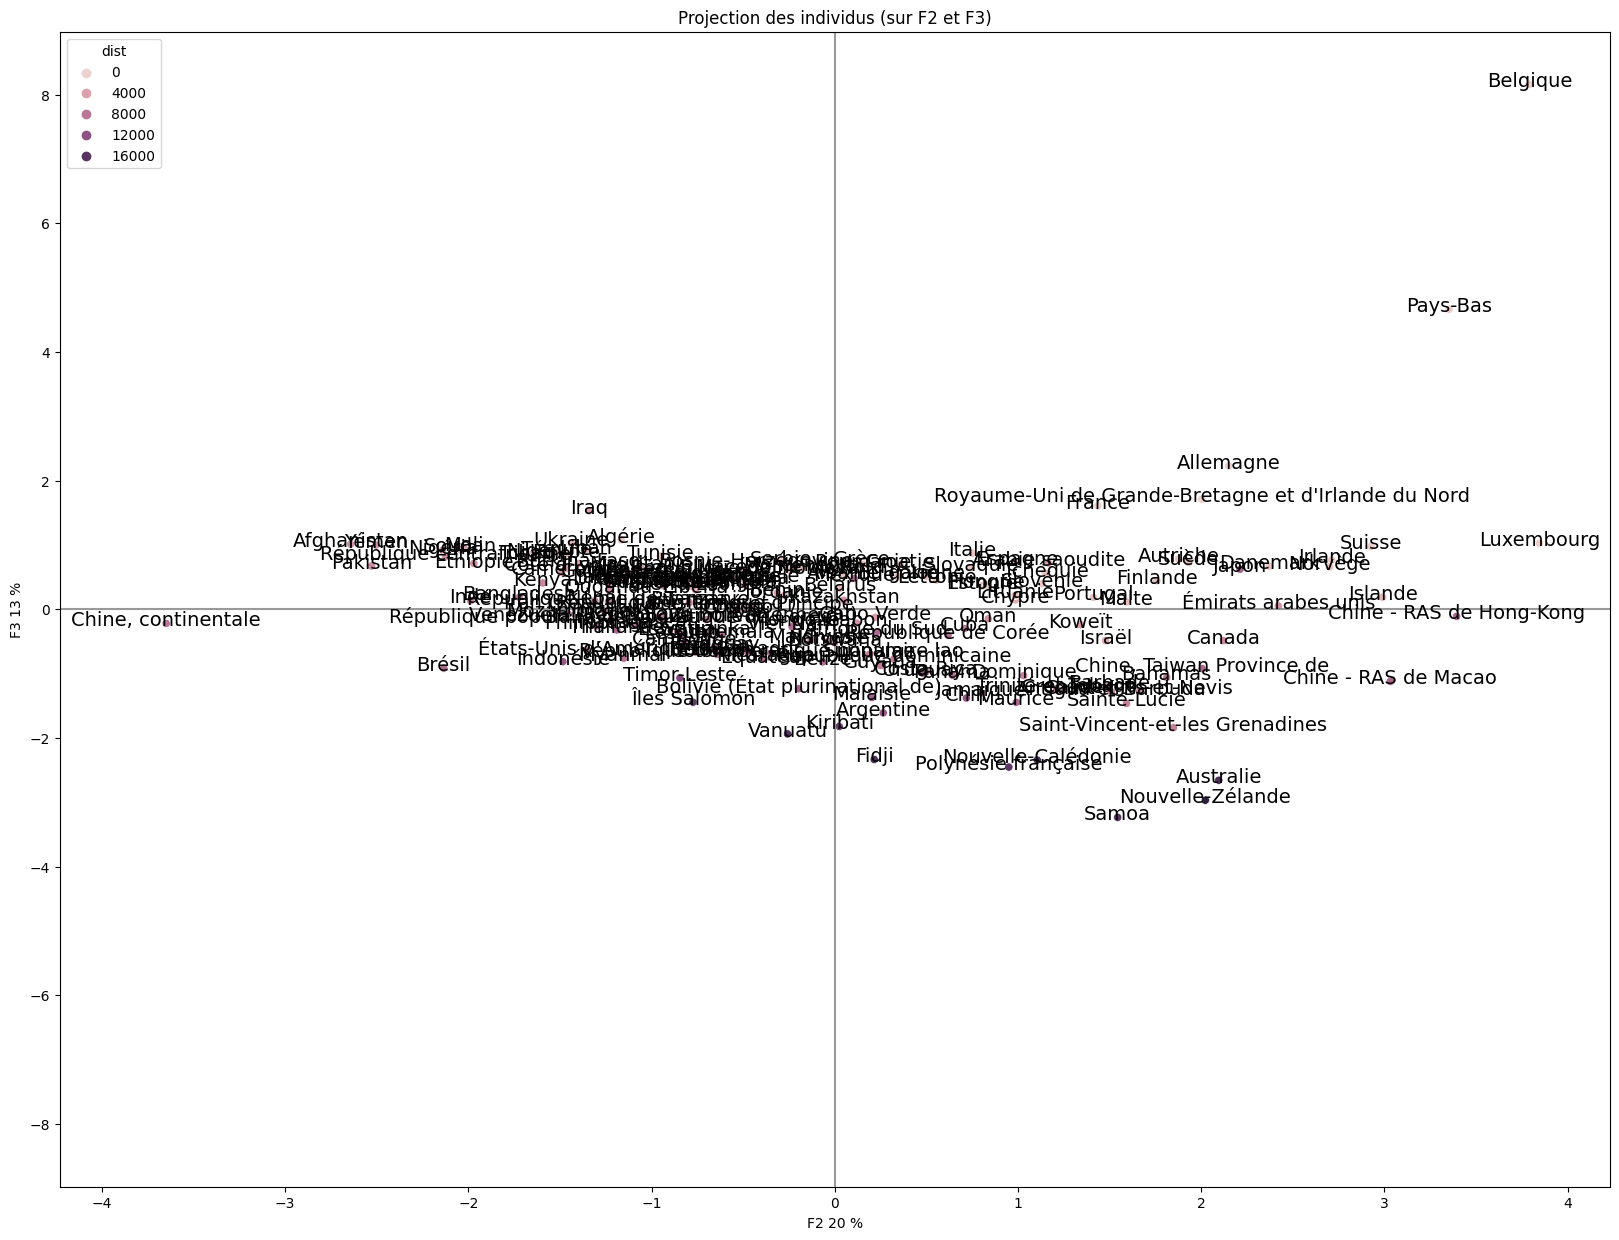

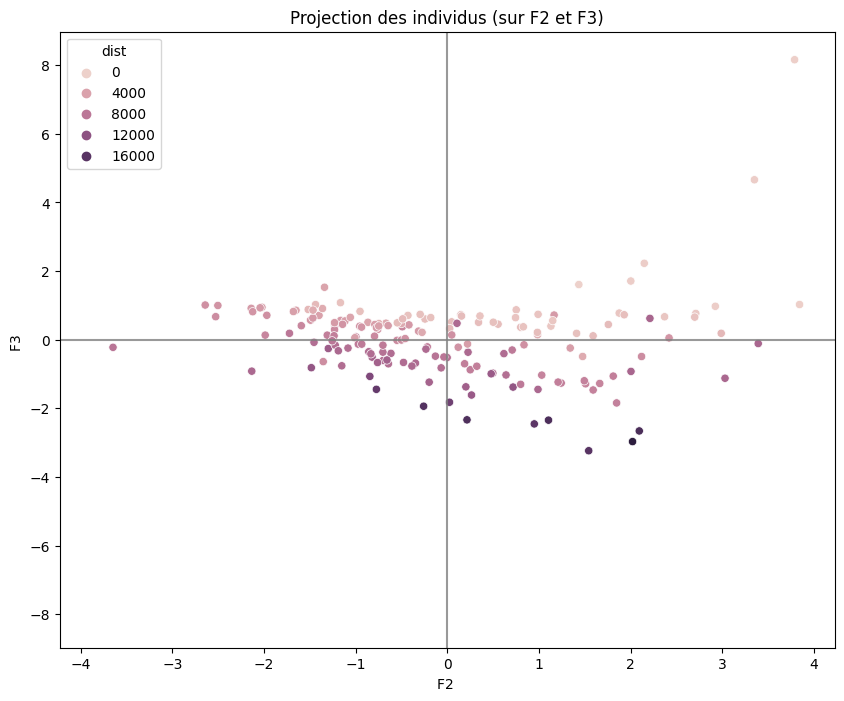

In [40]:
x_y = 1,2 #F2 et F3
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['dist'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['dist'])


In [41]:
x_y = (3,4) # on veut le cercle de correlation entre F4 et F5
x_y

(3, 4)

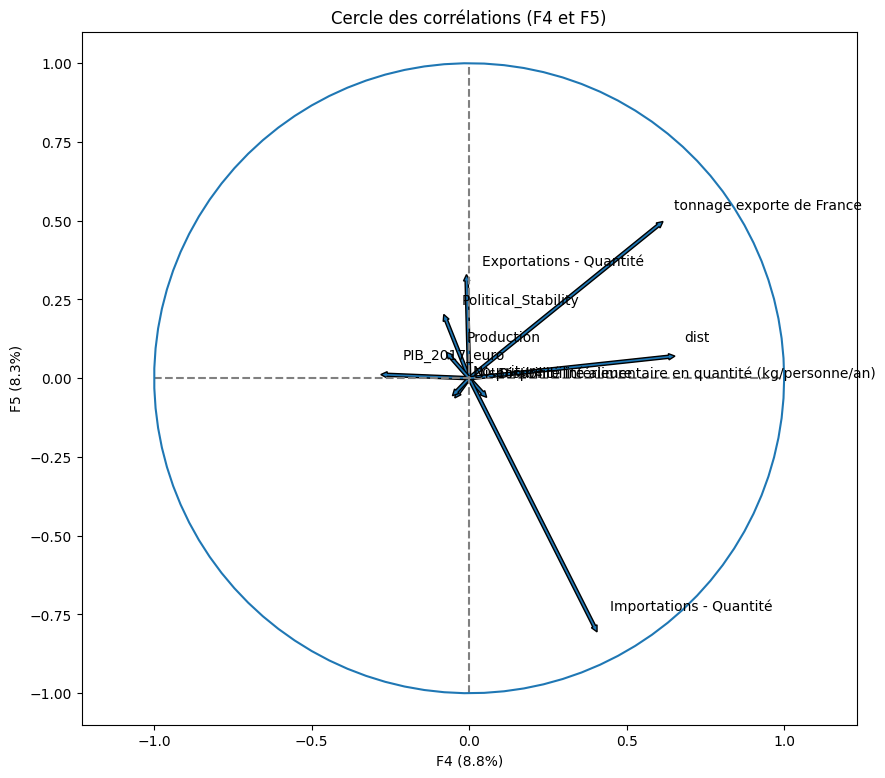

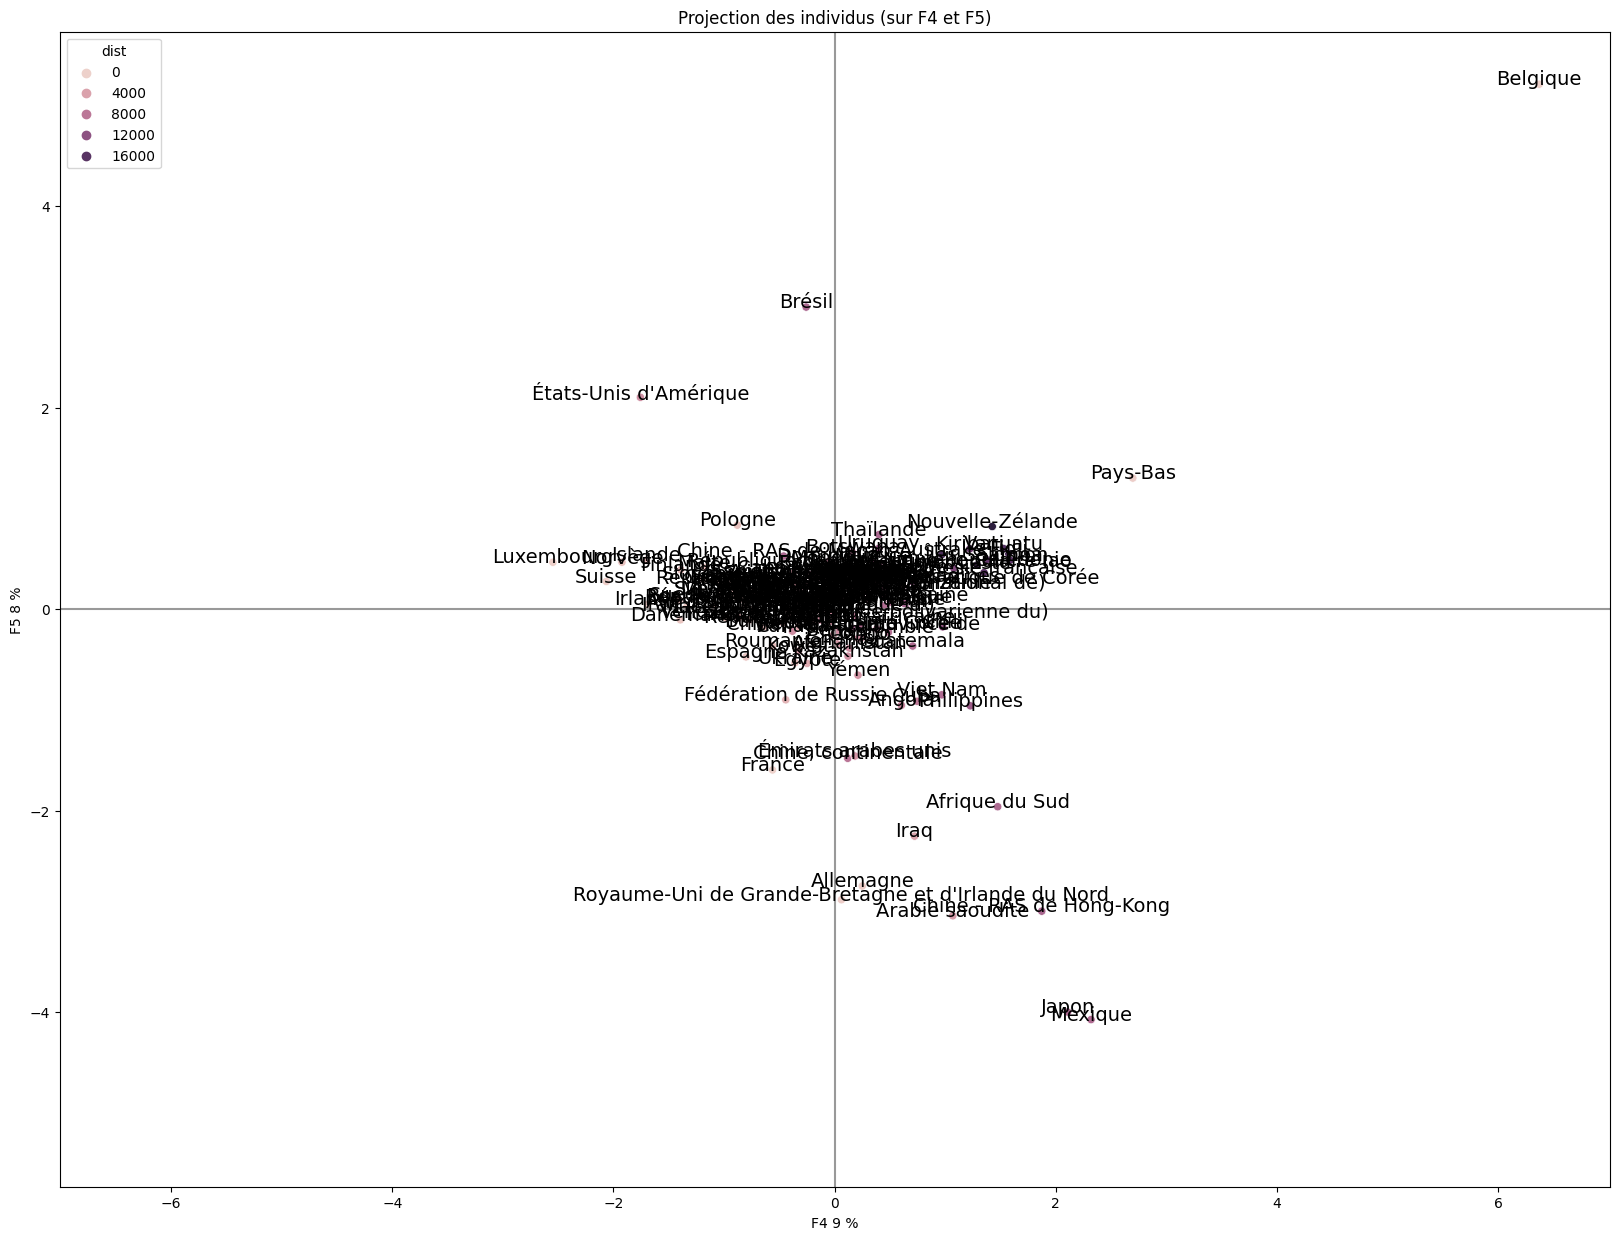

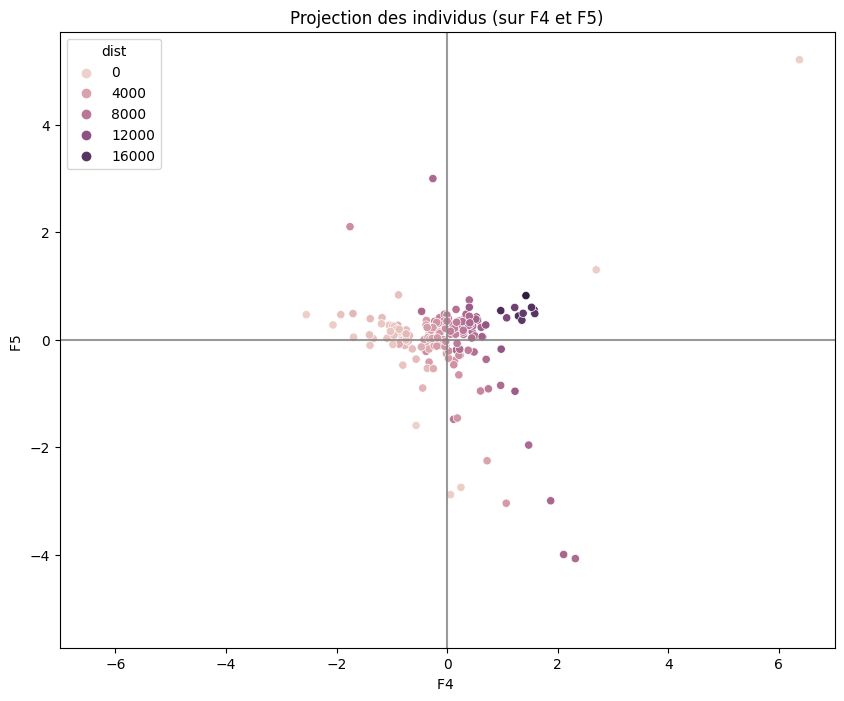

In [42]:
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['dist'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['dist'])


Identification des axes principaux d'inertie:
- F1 : Axe de production et d'exportation
- F2: aspect économique et politique
- F3: aspect géographique et commerce international
- F4: Echange commerciaux
- F5 : relation d'exportation de la france en relation avec les pays à faible importation

In [43]:
ranking_F1 = sorted(zip(names, X_proj[:, 0]), key=lambda x: x[1], reverse=True)
ranking_F2 = sorted(zip(names, X_proj[:, 1]), key=lambda x: x[1], reverse=True)
ranking_F3 = sorted(zip(names, X_proj[:, 2]), key=lambda x: x[1], reverse=True)
ranking_F4 = sorted(zip(names, X_proj[:, 3]), key=lambda x: x[1], reverse=True)
ranking_F5 = sorted(zip(names, X_proj[:, 4]), key=lambda x: x[1], reverse=True)

In [44]:
def create_ranking_df(ranking, col_name):
    df_ranking = pd.DataFrame(ranking, columns=['Pays', col_name])
    df_ranking['Position_' + col_name] = df_ranking[col_name].rank(ascending=False)
    return df_ranking

# Création des DataFrames de classement avec position
df_F1 = create_ranking_df(ranking_F1, 'Classement_F1')
df_F2 = create_ranking_df(ranking_F2, 'Classement_F2')
df_F3 = create_ranking_df(ranking_F3, 'Classement_F3')
df_F4 = create_ranking_df(ranking_F4, 'Classement_F4')
df_F5 = create_ranking_df(ranking_F5, 'Classement_F5')

In [45]:
df_F1 = pd.DataFrame(ranking_F1, columns=['Pays', 'Classement_F1'])
df_F2 = pd.DataFrame(ranking_F2, columns=['Pays', 'Classement_F2'])
df_F3 = pd.DataFrame(ranking_F3, columns=['Pays', 'Classement_F3'])
df_F4 = pd.DataFrame(ranking_F4, columns=['Pays', 'Classement_F4'])
df_F5 = pd.DataFrame(ranking_F5, columns=['Pays', 'Classement_F5'])

# Fusion des DataFrames en fonction du nom des pays
df_classements = pd.merge(df_F1, df_F2, on='Pays').merge(df_F3, on='Pays').merge(df_F4, on='Pays').merge(df_F5, on='Pays')

# Affichage du DataFrame résultant
df_classements

,Pays,Classement_F1,Classement_F2,Classement_F3,Classement_F4,Classement_F5
0,États-Unis d'Amérique,16.481629,-1.353994,-0.637896,-1.756824,2.103073
1,"Chine, continentale",12.112734,-3.648621,-0.221844,0.118001,-1.479394
2,Brésil,11.020340,-2.134115,-0.916086,-0.257735,2.998459
3,Mexique,2.967450,0.105975,0.479193,2.318521,-4.072388
4,Fédération de Russie,2.731837,-0.747733,0.473071,-0.441917,-0.898965
...,...,...,...,...,...,...
198,Niger,-1.009745,-1.651280,0.859031,-0.314559,0.014439
199,Tchad,-1.025049,-1.679747,0.821458,-0.269578,0.025348
200,République centrafricaine,-1.037817,-2.123746,0.816415,-0.043378,-0.125100
201,Afghanistan,-1.037847,-2.642372,1.011508,0.134158,-0.387818


# Kmeans

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

on test d'abord avec 5 clusters et on va travailer sur une copy appelé X de df

In [47]:
X = df.copy()

In [48]:
#on entraine le model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [49]:
#on peut calculer son inertie (somme des carrés des distances entre chaque point)
kmeans.inertia_

10056052851.070076

l'inertie étant très élevés, il semble que les points au point de chaque cluster sont dispersés sur de grande distances par rapport à leur centree

Evaluation du nombre de cluster par la méthode du coude

In [50]:
#on creer une liste vide pour enregistrer les inerties
inertia = []

In [51]:
# k=list : notre liste du nombre de cluster
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [52]:
#pour chaque nombre de cluster, on instancie un k_means pour k clusters puis on entraine le model et on enregistre l'inertie obtenue dans inertia
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  centroids  = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [53]:
inertia

[74490629796.76459,
 26316629706.73241,
 18968473554.853615,
 14263428900.004349,
 9964893294.333088,
 8854356747.930622,
 7627174984.191137,
 6541320058.976324,
 5378931270.146996,
 4618962327.736001]

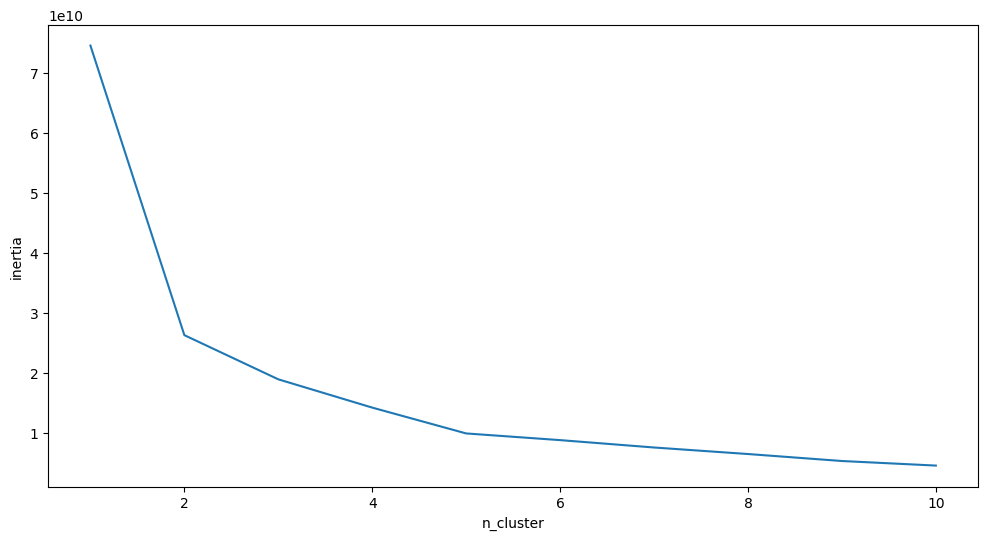

In [54]:
# affichage du graphique des inerties pour constater la cassure de la courbe
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

In [55]:
print("Dimensions des données:", X.shape)
print("Dimensions des centroids:", centroids.shape)

Dimensions des données: (173, 10)
Dimensions des centroids: (10, 10)


In [56]:
centroids

array([[ 5.65042857e+00, -7.24000000e-01,  2.45698200e+03,
         8.95628571e+00,  2.50214286e+02,  8.07142857e+00,
         3.50142857e+01,  2.36614286e+02,  2.23185714e+02,
         4.87475399e+03],
       [ 2.65449000e+03,  9.48333333e-01,  4.83558058e+04,
         3.11625000e+01,  5.83166667e+02,  2.75750000e+02,
         2.91083333e+02,  5.75333333e+02,  5.71166667e+02,
         6.11289427e+03],
       [ 3.81221429e+01,  3.87500000e-01,  1.63975621e+04,
         3.08017857e+01,  5.14500000e+02,  8.86428571e+01,
         7.56071429e+01,  5.02571429e+02,  5.55535714e+02,
         5.05429122e+03],
       [ 2.81800000e+00,  1.24200000e+00,  7.44572740e+04,
         2.50020000e+01,  7.84000000e+01,  1.94000000e+01,
         3.54000000e+01,  7.76000000e+01,  6.30000000e+01,
         2.87876338e+03],
       [ 7.10311000e+04,  4.30000000e-01,  4.41984800e+04,
         1.26500000e+01,  1.52000000e+02,  6.56000000e+02,
         3.38000000e+02,  1.44000000e+02,  4.63000000e+02,
         2.

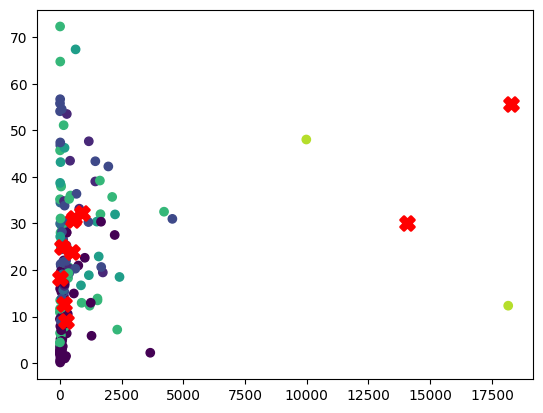

In [57]:
#visualisation des clusters et de leurs centroids
plt.scatter(X.iloc[:, 4], X.iloc[:, 3], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 4], centroids[:, 3], marker='X', s=100, linewidths=2, color='r')
plt.show()


In [58]:
centroids

array([[ 5.65042857e+00, -7.24000000e-01,  2.45698200e+03,
         8.95628571e+00,  2.50214286e+02,  8.07142857e+00,
         3.50142857e+01,  2.36614286e+02,  2.23185714e+02,
         4.87475399e+03],
       [ 2.65449000e+03,  9.48333333e-01,  4.83558058e+04,
         3.11625000e+01,  5.83166667e+02,  2.75750000e+02,
         2.91083333e+02,  5.75333333e+02,  5.71166667e+02,
         6.11289427e+03],
       [ 3.81221429e+01,  3.87500000e-01,  1.63975621e+04,
         3.08017857e+01,  5.14500000e+02,  8.86428571e+01,
         7.56071429e+01,  5.02571429e+02,  5.55535714e+02,
         5.05429122e+03],
       [ 2.81800000e+00,  1.24200000e+00,  7.44572740e+04,
         2.50020000e+01,  7.84000000e+01,  1.94000000e+01,
         3.54000000e+01,  7.76000000e+01,  6.30000000e+01,
         2.87876338e+03],
       [ 7.10311000e+04,  4.30000000e-01,  4.41984800e+04,
         1.26500000e+01,  1.52000000e+02,  6.56000000e+02,
         3.38000000e+02,  1.44000000e+02,  4.63000000e+02,
         2.

In [59]:
print(type(X))


<class 'pandas.core.frame.DataFrame'>


In [60]:
print("Centroids:", centroids)

Centroids: [[ 5.65042857e+00 -7.24000000e-01  2.45698200e+03  8.95628571e+00
   2.50214286e+02  8.07142857e+00  3.50142857e+01  2.36614286e+02
   2.23185714e+02  4.87475399e+03]
 [ 2.65449000e+03  9.48333333e-01  4.83558058e+04  3.11625000e+01
   5.83166667e+02  2.75750000e+02  2.91083333e+02  5.75333333e+02
   5.71166667e+02  6.11289427e+03]
 [ 3.81221429e+01  3.87500000e-01  1.63975621e+04  3.08017857e+01
   5.14500000e+02  8.86428571e+01  7.56071429e+01  5.02571429e+02
   5.55535714e+02  5.05429122e+03]
 [ 2.81800000e+00  1.24200000e+00  7.44572740e+04  2.50020000e+01
   7.84000000e+01  1.94000000e+01  3.54000000e+01  7.76000000e+01
   6.30000000e+01  2.87876338e+03]
 [ 7.10311000e+04  4.30000000e-01  4.41984800e+04  1.26500000e+01
   1.52000000e+02  6.56000000e+02  3.38000000e+02  1.44000000e+02
   4.63000000e+02  2.62384500e+02]
 [ 1.12803333e+02  3.95833333e-01  3.34103350e+04  3.22566667e+01
   8.88333333e+02  1.06583333e+02  2.48833333e+02  8.50500000e+02
   8.47333333e+02  4.7

La méthode du coude semble indiqué qu'il faut prendre 2 clusters. Vérifions cette indication par une autre méthode

In [61]:
#utilisation de la librairie kneed pour calculer le nombre de cluster
%pip install kneed
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

print(f'Nombre de cluster : {kl.elbow}')


Nombre de cluster : 2


L'utilisation de la librairie kneed qui permet d'identifier le point de coude d'une ligne ajustée aux données confirme un nombre de cluster de 2

Evaluation du nombre de cluster par la méthode de la silhouette

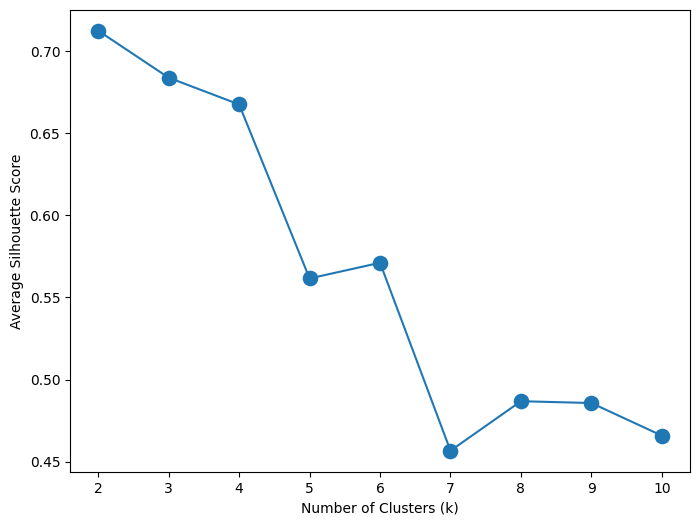

In [62]:
#The Average Silhouette Score
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

silhouette_series = pd.Series(silhouette, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')

plt.show()

In [63]:
silhouette_series

2     0.712532
3     0.683924
4     0.667614
5     0.561584
6     0.571150
7     0.456632
8     0.486793
9     0.485696
10    0.465819
dtype: float64

La méthode de la silhouette confirme qu'il faut prendre 2 clusters car pour k=2, on a le score silhouette le plus élevé

Cluster

In [64]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [65]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int32)

In [66]:
dd = {i:j for i,j in enumerate(list("abcdef"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f'}

In [67]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b']

In [68]:
X["cluster"] = labels
X

,tonnage exporte de France,Political_Stability,PIB_2017_euro,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,dist,cluster
Zone,,,,,,,,,,,
Afghanistan,0.00,-2.80,530.15,1.53,57.0,0.0,29.0,55.0,28.0,5590.3810,b
Afrique du Sud,0.00,-0.28,6734.48,35.69,2118.0,63.0,514.0,2035.0,1667.0,9353.5520,b
Albanie,0.44,0.38,4531.03,16.36,47.0,0.0,38.0,47.0,13.0,1603.5340,b
Algérie,51.47,-0.92,4134.94,6.38,277.0,0.0,2.0,264.0,275.0,1340.3900,b
Allemagne,1313.49,0.59,44652.59,19.47,1739.0,646.0,842.0,1609.0,1514.0,439.8984,a
...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.00,0.62,43063.97,43.47,412.0,94.0,433.0,412.0,48.0,5249.5350,a
Équateur,0.00,-0.07,6246.40,19.31,341.0,0.0,0.0,324.0,340.0,9367.0980,b
États-Unis d'Amérique,0.00,0.34,59907.75,55.68,18266.0,3692.0,123.0,18100.0,21914.0,5838.1570,a


In [69]:
clustera = X[X['cluster'] == 'a'].index
clusterb = X[X['cluster'] == 'b'].index

print("Cluster 'a' data:")
print(clustera)

print("\nCluster 'b' data:")
print(clusterb)


nba = (X['cluster'] == 'a').sum()
nbb = (X['cluster'] == 'b').sum()

print("Nombre d'éléments dans le cluster 'a':", nba)
print("Nombre d'éléments dans le cluster 'b':", nbb)


Cluster 'a' data:
Index(['Allemagne', 'Australie', 'Autriche', 'Bahamas', 'Belgique', 'Canada',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Danemark', 'Espagne', 'Finlande',
       'France', 'Irlande', 'Islande', 'Israël', 'Italie', 'Japon', 'Koweït',
       'Luxembourg', 'Malte', 'Norvège', 'Nouvelle-Calédonie',
       'Nouvelle-Zélande', 'Pays-Bas',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'République de Corée', 'Suisse', 'Suède', 'Émirats arabes unis',
       'États-Unis d'Amérique'],
      dtype='object', name='Zone')

Cluster 'b' data:
Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie',
       'Azerbaïdjan',
       ...
       'Vanuatu', 'Venezuela (République bolivarienne du)', 'Viet Nam',
       'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='

In [70]:
#sns.pairplot(X, hue="cluster")

Analyse et interprétation des clusters

Dendrogramme ou classification ascendante hierarchique selon la methode de ward

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [72]:
X = df
Z = linkage(X, method="ward")

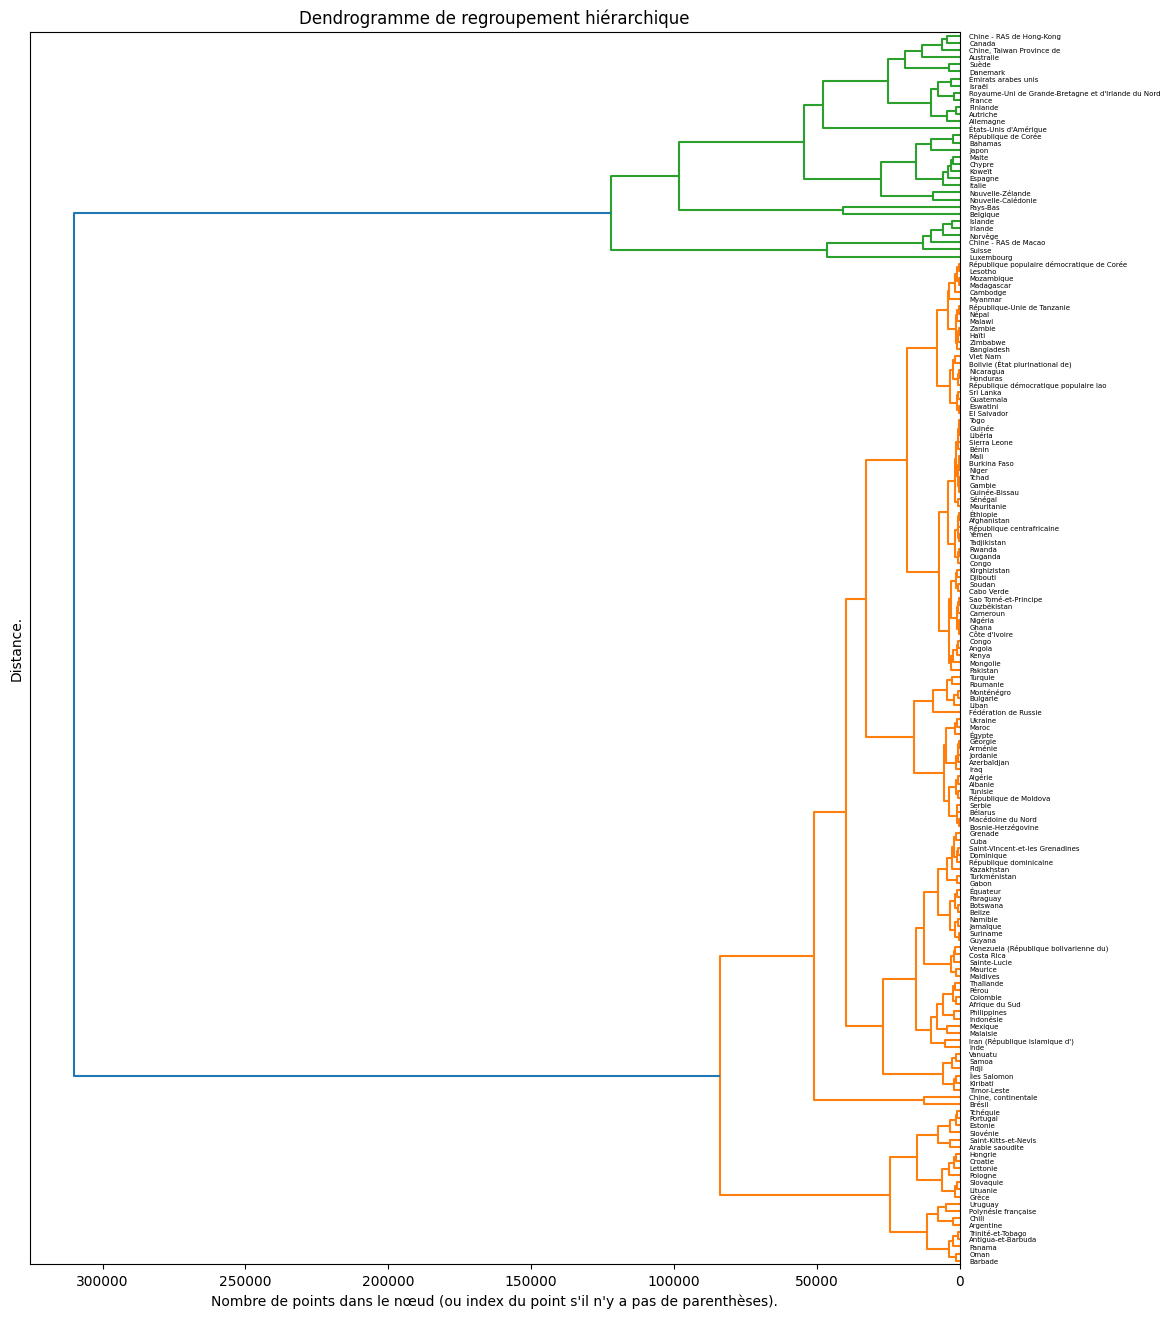

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

on rend le dendogram plus lisible en se limitant à 5 groupes

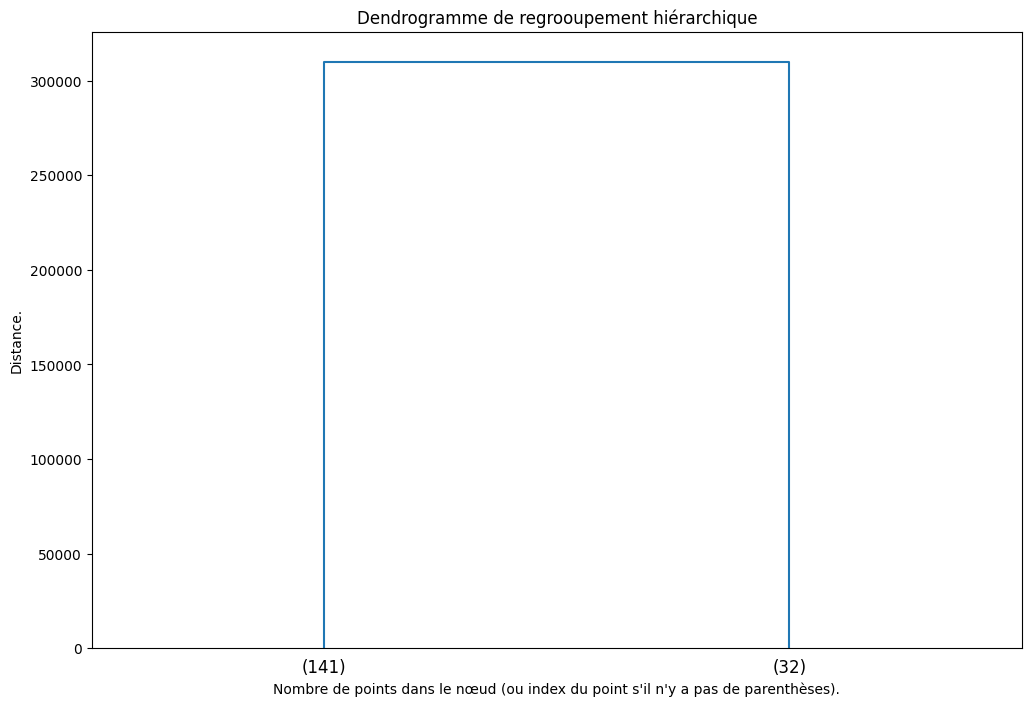

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=2, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

nous trouvons quasiment le même nombre d'élément pour chacun des 2 clusters que pour la méthode K Means

In [75]:
clusters = fcluster(Z, 15, criterion = 'distance')

In [76]:
X = df.values
Z = linkage(X, 'ward')
clusters = fcluster(Z, 15, criterion = 'distance')
dfclust = pd.DataFrame({'clusters cah': clusters, 'pays': names})
dfclust

,clusters cah,pays
0,104,Afghanistan
1,37,Afrique du Sud
2,68,Albanie
3,69,Algérie
4,162,Allemagne
...,...,...
168,166,Émirats arabes unis
169,53,Équateur
170,173,États-Unis d'Amérique
171,105,Éthiopie
